# Neural network models

__Multi-layer Perceptron (MLP)__ is a supervised learning algorithm that learns a function f(\cdot): R^m \rightarrow R^o by training on a dataset, where m is the number of dimensions for input and o is the number of dimensions for output. Given a set of features X = {x_1, x_2, ..., x_m} and a target y, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar output.

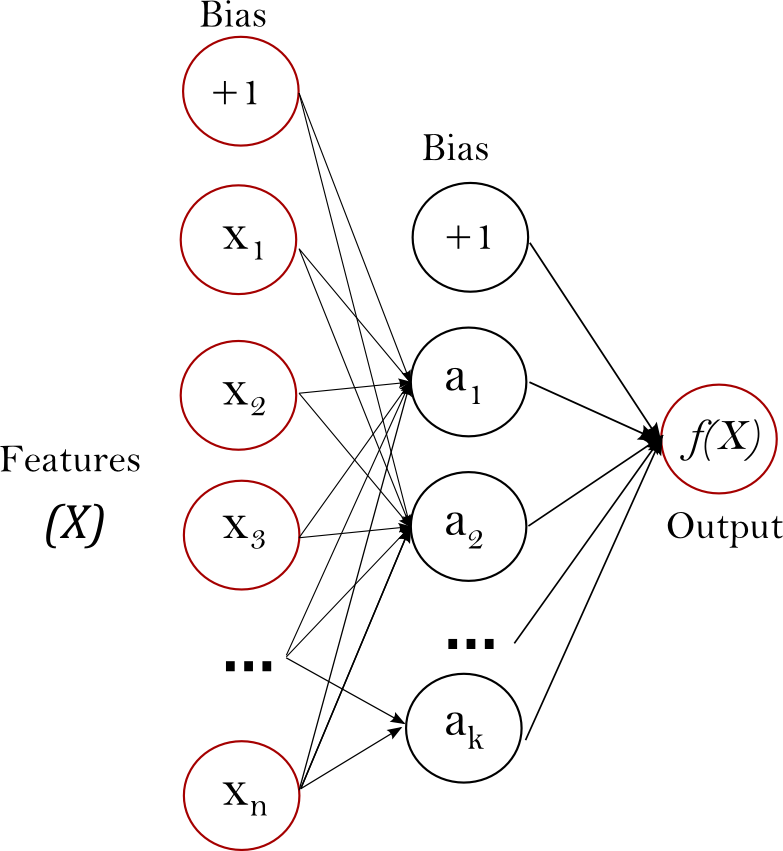


# Visualization of MLP weights on MNIST


Sometimes looking at the learned coefficients of a neural network can provide
insight into the learning behavior. For example if weights look unstructured,
maybe some were not used at all, or if very large coefficients exist, maybe
regularization was too low or the learning rate too high.

This example shows how to plot some of the first layer weights in a
MLPClassifier trained on the MNIST dataset.

The input data consists of 28x28 pixel handwritten digits, leading to 784
features in the dataset. Therefore the first layer weight matrix have the shape
(784, hidden_layer_sizes[0]).  We can therefore visualize a single column of
the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only
for a very short time. Training longer would result in weights with a much
smoother spatial appearance.



In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))


# Save the classifier
joblib.dump(mlp, "digits_mlp.pkl", compress=3)

Iteration 1, loss = 0.28833772
Iteration 2, loss = 0.10794344
Iteration 3, loss = 0.07889505
Iteration 4, loss = 0.06081647
Iteration 5, loss = 0.05005079
Iteration 6, loss = 0.03929399
Iteration 7, loss = 0.03312722
Iteration 8, loss = 0.02458840
Iteration 9, loss = 0.02280704
Iteration 10, loss = 0.01994174
Iteration 11, loss = 0.01521781
Iteration 12, loss = 0.01271448
Iteration 13, loss = 0.01315993
Iteration 14, loss = 0.00956860
Iteration 15, loss = 0.00867025
Iteration 16, loss = 0.00954226
Iteration 17, loss = 0.00595885
Iteration 18, loss = 0.00664248
Iteration 19, loss = 0.00514032
Iteration 20, loss = 0.00361282
Iteration 21, loss = 0.00333415
Iteration 22, loss = 0.00119923
Iteration 23, loss = 0.00054942
Iteration 24, loss = 0.00045487
Iteration 25, loss = 0.00042879
Iteration 26, loss = 0.00041385
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 1.000000
Test set score: 0.982400


['digits_mlp.pkl']

# Demo

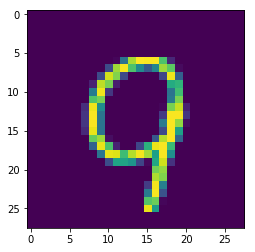

9.0

In [2]:
import matplotlib.pyplot as plt

image_index = 57997
image = mnist.data[image_index].reshape((28, 28))
plt.imshow(image)
plt.show()

mlp.predict([mnist.data[image_index]])[0]

In [3]:
# Import the modules
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np

# Load the classifier
clf = joblib.load("digits_mlp.pkl")

# Read the input image 
im = cv2.imread("numbers.jpg")

# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
_, ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

# For each rectangular region, calculate HOG features and predict
# the digit using Linear SVM.
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))

    nbr = clf.predict([roi.reshape(28 *28)])
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)


cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey()

-1